In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kmeans import kmeans
import numpy as np

In [2]:
trainLabels = pd.read_csv('open-images-v6/train/labels/detections.csv',index_col=0)

In [3]:
trainLabels['width'] = trainLabels['XMax'] - trainLabels['XMin']
trainLabels['height'] = trainLabels['YMax'] - trainLabels['YMin']

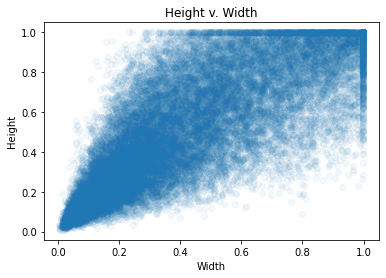

In [4]:
plt.title("Height v. Width")
plt.scatter(trainLabels['width'], trainLabels['height'], alpha=0.05)
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [6]:
NUM_CLUSTERS = 20
avgIOU = []
for i in range(1, NUM_CLUSTERS+1):
    print('Num Clusters: ', i)
    clusters, centroids, meanCentroidIOU, num_iters = kmeans(trainLabels[['width','height']].values, i, 150)
    print('Num Iters: ', num_iters)
    print('Avg IOU:', meanCentroidIOU)
    avgIOU.append(meanCentroidIOU)
    print('____________________________________')

Num Clusters:  1
Num Iters:  2
Avg IOU: 0.3990435432690365
____________________________________
Num Clusters:  2
Num Iters:  19
Avg IOU: 0.5410000580884047
____________________________________
Num Clusters:  3
Num Iters:  29
Avg IOU: 0.6117668395069042
____________________________________
Num Clusters:  4
Num Iters:  31
Avg IOU: 0.6510462002430614
____________________________________
Num Clusters:  5
Num Iters:  40
Avg IOU: 0.6733179443296111
____________________________________
Num Clusters:  6
Num Iters:  66
Avg IOU: 0.6917286571923396
____________________________________
Num Clusters:  7
Num Iters:  69
Avg IOU: 0.7082256741490291
____________________________________
Num Clusters:  8
Num Iters:  71
Avg IOU: 0.7210322703126454
____________________________________
Num Clusters:  9
Num Iters:  103
Avg IOU: 0.7334234921771189
____________________________________
Num Clusters:  10
Num Iters:  136
Avg IOU: 0.7430179397958085
____________________________________
Num Clusters:  11
Num Iters:

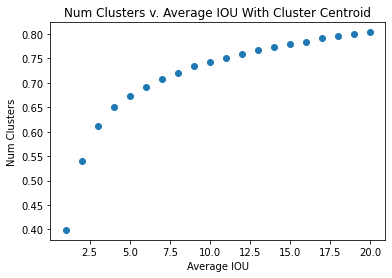

In [7]:
plt.title("Num Clusters v. Average IOU With Cluster Centroid")
plt.scatter(x=np.arange(1,NUM_CLUSTERS+1), y=avgIOU,marker='o')
plt.xlabel('Average IOU')
plt.ylabel('Num Clusters')
plt.show()

In [8]:
clusters, centroids, meanCentroidIOU, num_iters = KMEANS(trainLabels[['width','height']].values, 7, 150)

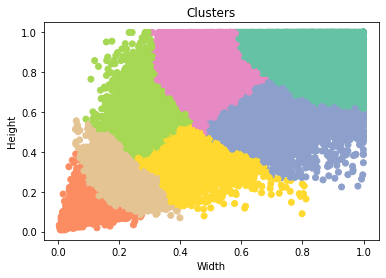

In [9]:
import seaborn as sns

trainLabels['Cluster'] = clusters

rgb_values = sns.color_palette("Set2", 7)

color_labels = trainLabels['Cluster'].unique()

color_map = dict(zip(color_labels, rgb_values))

plt.title("Clusters")
plt.scatter(trainLabels['width'], trainLabels['height'], c=trainLabels['Cluster'].map(color_map))
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

In [10]:
with open('centroids.npy', 'wb') as f:
    np.save(f, centroids)